In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, f_classif

# Load the preprocessed dataset
train_path = "Processed_TrainSet.csv"  # Ensure this is the correct file path
train_df = pd.read_csv(train_path)

# Separate features and target variable
X = train_df.drop(columns=["class"])  # Features
y = train_df["class"]  # Target

### 1. FILTER METHODS: MUTUAL INFORMATION & ANOVA F-TEST ###

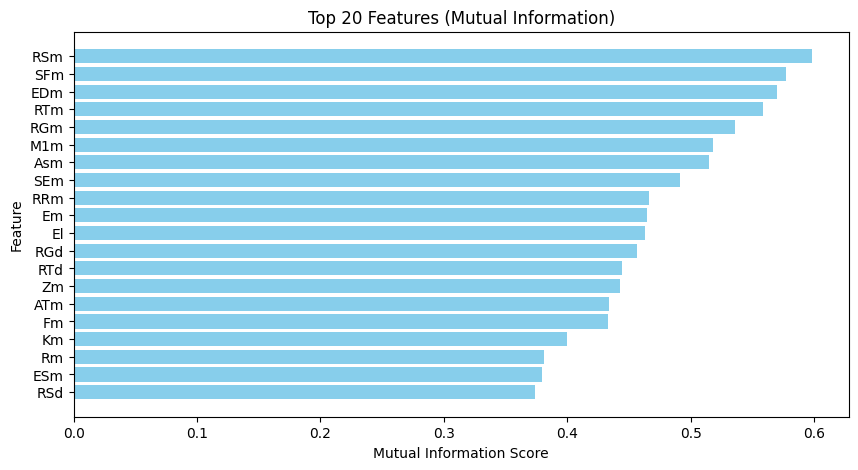

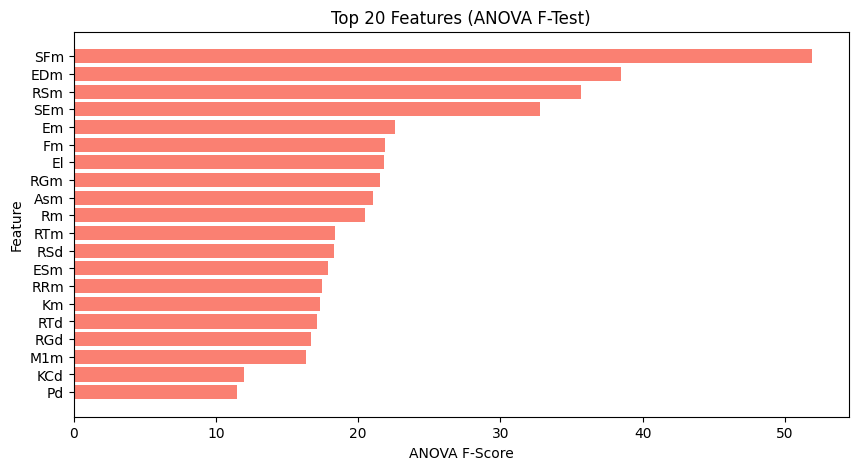

Top 20 Features Based on Mutual Information:
   Feature  Mutual_Info
55     RSm     0.598098
37     SFm     0.577439
7      EDm     0.570132
59     RTm     0.558269
61     RGm     0.535637
41     M1m     0.518227
5      Asm     0.514639
35     SEm     0.491480
57     RRm     0.466381
0       Em     0.464752
2       El     0.462575
62     RGd     0.456411
60     RTd     0.444610
31      Zm     0.442969
4      ATm     0.433401
38      Fm     0.433197
34      Km     0.399454
26      Rm     0.381178
25     ESm     0.379119
56     RSd     0.374106

Top 20 Features Based on ANOVA F-Test:
   Feature    ANOVA_F
37     SFm  51.880142
7      EDm  38.455252
55     RSm  35.630804
35     SEm  32.746549
0       Em  22.564186
38      Fm  21.875438
2       El  21.845321
61     RGm  21.511067
5      Asm  21.065563
26      Rm  20.508576
59     RTm  18.399276
56     RSd  18.271724
25     ESm  17.876050
57     RRm  17.470932
34      Km  17.345572
60     RTd  17.128592
62     RGd  16.662909
41     M1m  16.

In [ ]:


# Compute Mutual Information
mi_scores = mutual_info_classif(X, y)
mi_scores_df = pd.DataFrame({"Feature": X.columns, "Mutual_Info": mi_scores})
mi_scores_df = mi_scores_df.sort_values(by="Mutual_Info", ascending=False)

# Compute ANOVA F-Test Scores
f_scores, _ = f_classif(X, y)
anova_scores_df = pd.DataFrame({"Feature": X.columns, "ANOVA_F": f_scores})
anova_scores_df = anova_scores_df.sort_values(by="ANOVA_F", ascending=False)

# Display top 20 features by Mutual Information
plt.figure(figsize=(10, 5))
plt.barh(mi_scores_df["Feature"][:20], mi_scores_df["Mutual_Info"][:20], color='skyblue')
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.title("Top 20 Features (Mutual Information)")
plt.gca().invert_yaxis()
plt.show()

# Display top 20 features by ANOVA F-Test
plt.figure(figsize=(10, 5))
plt.barh(anova_scores_df["Feature"][:20], anova_scores_df["ANOVA_F"][:20], color='salmon')
plt.xlabel("ANOVA F-Score")
plt.ylabel("Feature")
plt.title("Top 20 Features (ANOVA F-Test)")
plt.gca().invert_yaxis()
plt.show()


# Print summary
print("Top 20 Features Based on Mutual Information:")
print(mi_scores_df.head(20))

print("\nTop 20 Features Based on ANOVA F-Test:")
print(anova_scores_df.head(20))


In [ ]:
# Features common in both Mutual Information & ANOVA F-Test
selected_features = [
    "SFm", "EDm", "RSm", "SEm", "Em", "El", "RGm", "Asm", "Rm",
    "RTm", "RSd", "ESm", "RRm", "Km", "RTd", "RGd", "M1m"
]

# Extract only selected features + target column
filtered_train_df = train_df[selected_features + ["class"]]
filtered_train_df.to_csv("Filtered_TrainSet.csv", index=False)

17
